In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.compat.v1.train import Optimizer
from tensorflow.compat.v1.ragged import RaggedTensorValue
from tensorflow.keras.layers import Dense

tf.compat.v1.disable_eager_execution()  # Disables eager execution
tf.compat.v1.ragged.RaggedTensorValue  # Use this instead of tf.ragged.RaggedTensorValue
tf.compat.v1.executing_eagerly_outside_functions  # Use this instead of tf.executing_eagerly_outside_functions




<function tensorflow.python.framework.ops.executing_eagerly_outside_functions()>

In [2]:
train_data_dir = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
val_data_dir = "C:\\Users\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid"

In [3]:
train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)

In [4]:
val_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [5]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 4332 images belonging to 6 classes.


In [6]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 1853 images belonging to 6 classes.


In [7]:
cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),
cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))

cnn.add(layers.Dense(6,activation='softmax'))

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [9]:
from tensorflow.compat.v1.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)


In [10]:
cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [12]:
from tensorflow.keras.optimizers import Adam

history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    steps_per_epoch = 4332/32,
                    epochs = 20,
                    validation_steps = 1853/32,
                    validation_data = val_gen)  


Epoch 1/20

136/135 [==============================] - ETA: 0s - batch: 67.5000 - size: 31.8529 - loss: 1.5228 - accuracy: 0.3652

C:\Users\Bhargavi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


135/135 [==============================] - 235s 2s/step - batch: 67.5000 - size: 31.8529 - loss: 1.5228 - accuracy: 0.3652 - val_loss: 1.2508 - val_accuracy: 0.5618
Epoch 2/20
135/135 [==============================] - 211s 2s/step - batch: 67.5000 - size: 31.8529 - loss: 1.0762 - accuracy: 0.5926 - val_loss: 0.9069 - val_accuracy: 0.6552
Epoch 3/20
135/135 [==============================] - 208s 2s/step - batch: 67.5000 - size: 31.8529 - loss: 0.8489 - accuracy: 0.6729 - val_loss: 0.8759 - val_accuracy: 0.6584
Epoch 4/20
135/135 [==============================] - 173s 1s/step - batch: 67.5000 - size: 31.8529 - loss: 0.7546 - accuracy: 0.7209 - val_loss: 0.7035 - val_accuracy: 0.7302
Epoch 5/20
135/135 [==============================] - 65s 483ms/step - batch: 67.5000 - size: 31.8529 - loss: 0.6165 - accuracy: 0.7735 - val_loss: 0.6194 - val_accuracy: 0.7712
Epoch 6/20
135/135 [==============================] - 64s 472ms/step - batch: 67.5000 - size: 31.8529 - loss: 0.5644 - accuracy: 

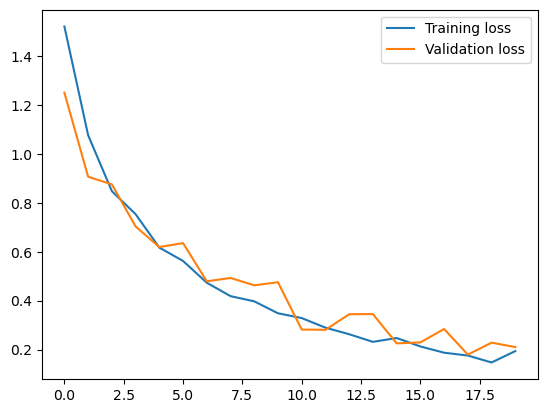

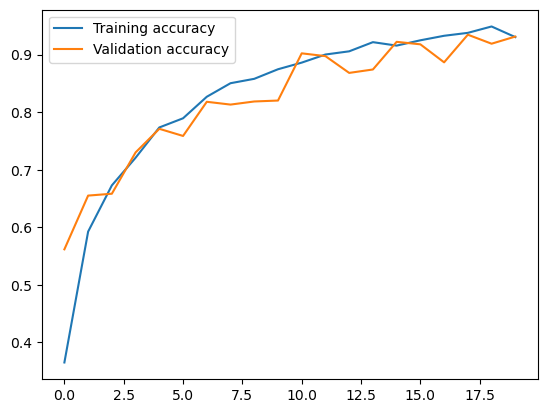

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()


In [14]:
IMAGE_SIZE = (224, 224)

train_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
valid_path = "C:\\Users\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid"

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

Found 6185 images belonging to 6 classes.
Found 2649 images belonging to 6 classes.


In [17]:
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
x = base_model.output
x = Flatten()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [19]:
model = Model(inputs=base_model.input, outputs=predictions)

In [20]:
for layer in base_model.layers:
    layer.trainable = False

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator)
)

Epoch 1/20
97/97 [==============================] - 199s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 2.3925 - accuracy: 0.8369 - val_loss: 11.7890 - val_accuracy: 0.2163
Epoch 2/20
97/97 [==============================] - 197s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 0.5221 - accuracy: 0.9541 - val_loss: 16.7905 - val_accuracy: 0.0495
Epoch 3/20
97/97 [==============================] - 196s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 0.5302 - accuracy: 0.9539 - val_loss: 15.6847 - val_accuracy: 0.0495
Epoch 4/20
97/97 [==============================] - 195s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 0.4319 - accuracy: 0.9667 - val_loss: 22.8671 - val_accuracy: 0.0495
Epoch 5/20
97/97 [==============================] - 197s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 0.3556 - accuracy: 0.9728 - val_loss: 29.0208 - val_accuracy: 0.0495
Epoch 6/20
97/97 [==============================] - 197s 2s/step - batch: 48.0000 - size: 63.7629 - loss: 0.3340 - accuracy: 

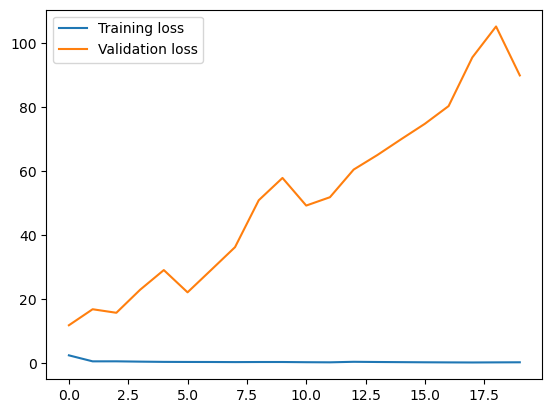

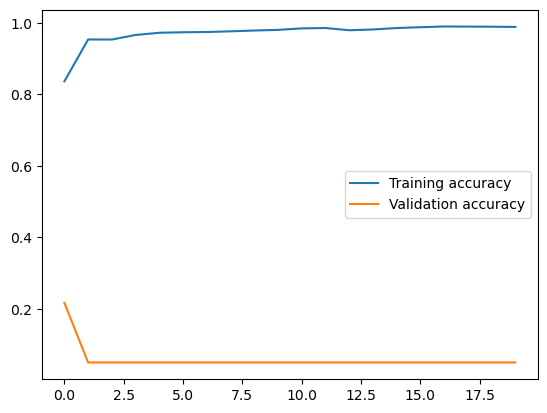

In [23]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [3]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Lambda, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
IMAGE_SIZE = (200, 200)

train_path = "C:\\Users\\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato train"
valid_path = "C:\\Users\Bhargavi\\OneDrive\\Desktop\\dataset\\tomato valid"

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

valid_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    batch_size=64,
    class_mode='categorical'
)

Found 6185 images belonging to 6 classes.
Found 2649 images belonging to 6 classes.


In [6]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(200,200,3))
base_model.trainable = False 

In [7]:
from tensorflow.keras import layers, models

# Define your layers
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(6, activation='softmax')

In [8]:
tl_model = tf.keras.applications.VGG16(include_top=False)
tl_model.trainable = False
inputs = layers.Input(shape=(200, 200, 3), name='input_layer')
x = tl_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(6, activation='relu')(x)
model2= tf.keras.Model(inputs, outputs)

In [9]:
model2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

epochs = 20  # Define the number of epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

opt = Adam(lr=0.001, clipvalue=0.5)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model2.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    callbacks=[reduce_lr]
)



Epoch 1/20



97/97 [==============================] - 328s 3s/step - loss: 5.0434 - accuracy: 0.2781 - val_loss: nan - val_accuracy: 0.4526 - lr: 0.0010
Epoch 2/20
97/97 [==============================] - 319s 3s/step - loss: nan - accuracy: 0.2441 - val_loss: nan - val_accuracy: 0.2408 - lr: 0.0010
Epoch 3/20
97/97 [==============================] - 317s 3s/step - loss: nan - accuracy: 0.2407 - val_loss: nan - val_accuracy: 0.2408 - lr: 0.0010
Epoch 4/20
97/97 [==============================] - 314s 3s/step - loss: nan - accuracy: 0.2407 - val_loss: nan - val_accuracy: 0.2408 - lr: 2.0000e-04
Epoch 5/20
97/97 [==============================] - 316s 3s/step - loss: nan - accuracy: 0.2407 - val_loss: nan - val_accuracy: 0.2408 - lr: 2.0000e-04
Epoch 6/20
97/97 [==============================] - 315s 3s/step - loss: nan - accuracy: 0.2407 - val_loss: nan - val_accuracy: 0.2408 - lr: 2.0000e-04
Epoch 7/20
97/97 [==============================] - 315s 3s/step - loss: nan - accuracy: 0.2407 - val_loss: 

ValueError: 'lower right ' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

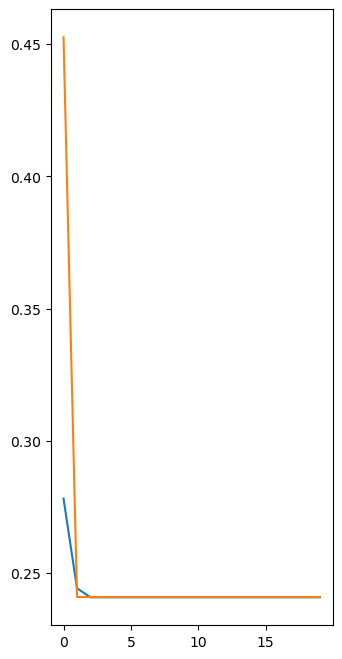

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
        
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right ')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow import keras
model_4 = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(200,200,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')  # Changed to 6 classes and softmax activation
])


In [13]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 96)        34944     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 96)        384       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 batch_normalization_1 (Bat  (None, 23, 23, 256)       1024      
 chNormalization)                                                
                                                        

In [14]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history_2 = model_4.fit(
  train_generator,
  validation_data= valid_generator,
  epochs=epochs
)

Epoch 1/20
97/97 [==============================] - 284s 3s/step - loss: 4.1556 - accuracy: 0.5146 - val_loss: 2.6555 - val_accuracy: 0.2544
Epoch 2/20
97/97 [==============================] - 284s 3s/step - loss: 0.8861 - accuracy: 0.6993 - val_loss: 3.9191 - val_accuracy: 0.2956
Epoch 3/20
97/97 [==============================] - 284s 3s/step - loss: 0.7495 - accuracy: 0.7418 - val_loss: 4.3821 - val_accuracy: 0.2880
Epoch 4/20
97/97 [==============================] - 275s 3s/step - loss: 0.5796 - accuracy: 0.8065 - val_loss: 3.2853 - val_accuracy: 0.4806
Epoch 5/20
97/97 [==============================] - 273s 3s/step - loss: 0.5280 - accuracy: 0.8241 - val_loss: 3.2816 - val_accuracy: 0.4005
Epoch 6/20
97/97 [==============================] - 273s 3s/step - loss: 0.4661 - accuracy: 0.8424 - val_loss: 3.6348 - val_accuracy: 0.3990
Epoch 7/20
97/97 [==============================] - 269s 3s/step - loss: 0.4173 - accuracy: 0.8624 - val_loss: 3.3570 - val_accuracy: 0.4726
Epoch 8/20
97

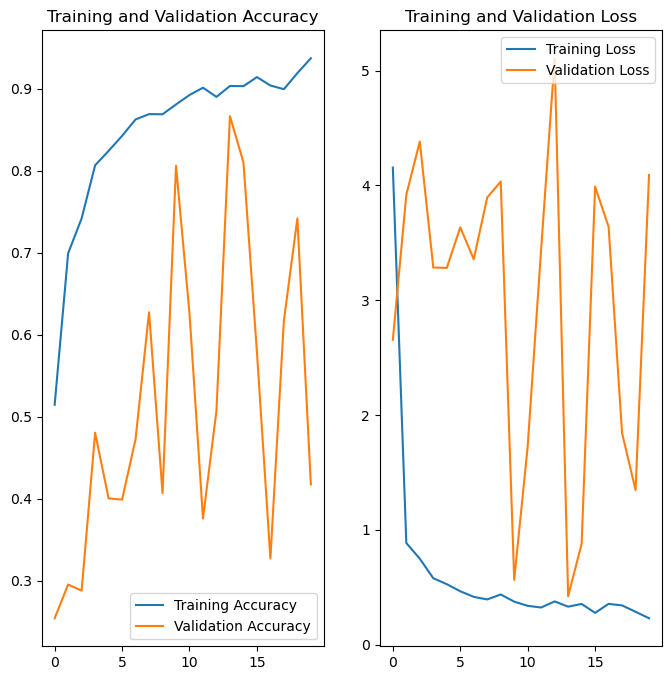

In [15]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()